In [136]:
# Code used for Elo Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%store -r cg
%store -r mg


In [137]:
cg = cg
mg = mg


In [ ]:
# I just realized, this 'linear performance rating' is not that useful as a metric over avrg opp rating for magnus since he wins so often.
# not that useful because magnus is literally the greatest player ever and does not lose that often
# That means the lp rating will be very correlated to avrg opponent rating
# It only stops being correlated when one plays vs higher rated players but he is among the highest rated
# This metric is a lot more useful for players that have fscores that vary a lot above and below .5 
# Magnus's fscore goes from .83 against ~2363 rated players to .64 against ~3151 rated players

In [138]:
# Converts a number of wins, losses, and ties to a fractional score (fscore), intended for the valuecounts
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()


In [139]:
# https://en.wikipedia.org/wiki/Elo_rating_system
# Lichess uses the glicko2 rating system which is more accurate and way more complex than Elo.
# Therefore, there will be a difference between the ratings on lichess and the ratings I calculate here
# I'll be using the linear performance rating system which is simple compared to the original Elo rating system.
# this rating represents what's the rating necessary to get that performance, that's why its low?
# rating = avrg opponent rating + 800*winratepercentage - 400
def rating(avrgopprating,winratepercentage):
    return avrgopprating + 800*winratepercentage - 400


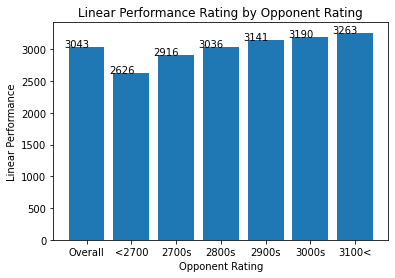

In [157]:
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] 
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.opp_elo<2700].opp_elo),fscore(vc(mg,mg.opp_elo<2700))),
    rating(np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700)))),
    rating(np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800)))),
    rating(np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900)))),
    rating(np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000)))),
    rating(np.mean(mg[mg.opp_elo>3100].opp_elo),fscore(vc(mg,mg.opp_elo>3100)))]
ratings = y
plt.bar(x,y)
plt.title('Linear Performance Rating by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index-0.5, value,
             str(round(value)))
plt.show()


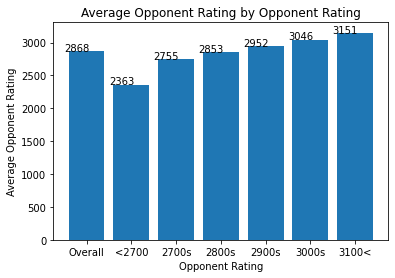

In [158]:
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] 
y = [np.mean(mg.opp_elo), np.mean(mg[mg.opp_elo<2700].opp_elo),
    np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),
    np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),
    np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),
    np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),
    np.mean(mg[mg.opp_elo>3100].opp_elo)]
means = y
plt.bar(x,y)
plt.title('Average Opponent Rating by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Average Opponent Rating')
for index, value in enumerate(y):
    plt.text(index-0.5, value,
             str(round(value)))
plt.show()


In [162]:
testing = pd.DataFrame([ratings,means]).T
testing

,0,1
0,3043.068971,2867.648145
1,2626.350235,2362.688263
2,2916.000000,2755.106145
3,3036.162801,2852.806730
4,3140.642283,2952.378617
5,3190.335833,3046.130897
6,3263.288451,3150.612394


<AxesSubplot:xlabel='0', ylabel='1'>

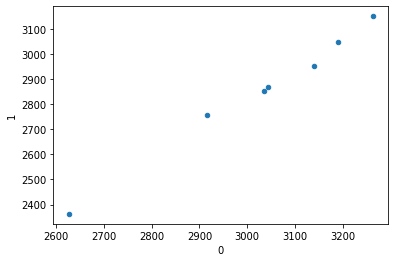

In [163]:
testing.plot.scatter(x=0,y=1)

In [166]:
fpoints = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),fscore(vc(mg,mg.opp_elo>=3100))]
testing2 = pd.DataFrame([means,fpoints]).T
testing2

,0,1
0,2867.648145,0.719276
1,2362.688263,0.829577
2,2755.106145,0.701117
3,2852.806730,0.729195
4,2952.378617,0.735330
5,3046.130897,0.680256
6,3150.612394,0.639955


<AxesSubplot:xlabel='0', ylabel='1'>

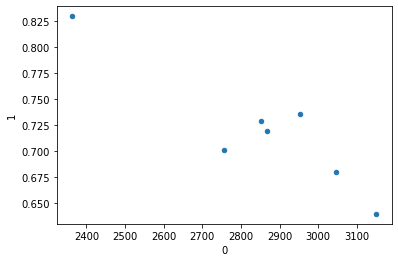

In [167]:
testing2.plot.scatter(x=0,y=1)

In [168]:
testing2.corr(method='pearson')

,0,1
0,1.000000,-0.916551
1,-0.916551,1.000000


In [164]:
# .996 correlation wow
# win rate varies and opponent rating varies, should be negatively correlated, and lp rating could be used a metric to stay constant and isolate variables
# except it doesnt for magnus s
testing.corr(method='pearson')

,0,1
0,1.000000,0.996088
1,0.996088,1.000000


In [141]:
mg

,magnus_color,mag_elo,opp_elo,magnus_result,eco,time_control,datetime
0,black,2500.0,2532.0,lost,E47,60+0,2017.12.14 21:00:02
1,black,2558.0,2420.0,lost,B01,60+0,2017.12.14 21:01:10
2,black,2493.0,2754.0,lost,B01,60+0,2017.12.14 21:04:13
3,black,2566.0,2755.0,lost,A01,60+0,2017.12.14 21:06:30
4,black,2627.0,2275.0,lost,A01,60+0,2017.12.14 21:07:57
...,...,...,...,...,...,...,...
13421,white,3202.0,2984.0,won,B20,180+0,2021.12.23 23:07:55
13422,black,3204.0,2982.0,won,E48,180+0,2021.12.23 23:10:43
13423,white,3207.0,2979.0,won,B20,180+0,2021.12.23 23:15:48
13424,black,3209.0,2977.0,won,E48,180+0,2021.12.23 23:21:54


In [142]:
rating(np.mean(mg[mg.magnus_color=='white'].opp_elo),fscore(vc(mg,mg.magnus_color=='white')))

3070.591977248915

In [143]:
rating(np.mean(mg[mg.magnus_color=='black'].opp_elo),fscore(vc(mg,mg.magnus_color=='black')))

3015.8071163825057

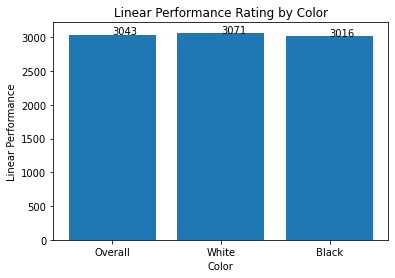

In [144]:
x = ['Overall','White','Black']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.magnus_color=='white'].opp_elo),fscore(vc(mg,mg.magnus_color=='white'))),
    rating(np.mean(mg[mg.magnus_color=='black'].opp_elo),fscore(vc(mg,mg.magnus_color=='black')))]
    
plt.bar(x,y)
plt.title('Linear Performance Rating by Color')
plt.xlabel('Color')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)))
plt.show()

In [145]:
# not influenced by opponent, graph stays
print('Overall: ',np.mean(mg.opp_elo))
print(np.mean(mg[mg.magnus_color=='white'].opp_elo))
print(np.mean(mg[mg.magnus_color=='black'].opp_elo))

Overall:  2867.6481453895426
2867.9277054333184
2867.37123795404


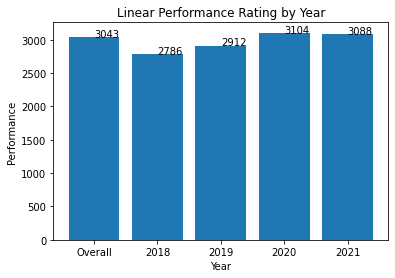

In [146]:
# avrg opponent rating had more influence than win rate here 
x = ['Overall','2018','2019','2020','2021']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2018'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2019'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2020'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2021')))]
plt.bar(x,y)
plt.title('Linear Performance Rating by Year')
plt.xlabel('Year')
plt.ylabel('Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)))
plt.show()

In [147]:
print(np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo))

2600.9757575757576
2684.9205859676176
2938.6543801652892
2905.3835410399656


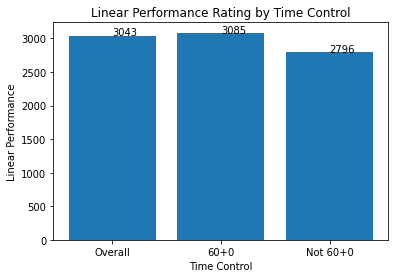

In [148]:
x = ['Overall','60+0','Not 60+0']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.time_control=='60+0'].opp_elo),fscore(vc(mg,mg.time_control=='60+0'))),
    rating(np.mean(mg[mg.time_control!='60+0'].opp_elo),fscore(vc(mg,mg.time_control!='60+0')))]
plt.bar(x,y)
plt.title('Linear Performance Rating by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)))
plt.show()

In [149]:
print(np.mean(mg[mg.time_control=='60+0'].opp_elo))
print(np.mean(mg[mg.time_control!='60+0'].opp_elo))

2910.2312123592565
2619.870492635856
